In [ ]:
# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE
 # send it to cyrus after done

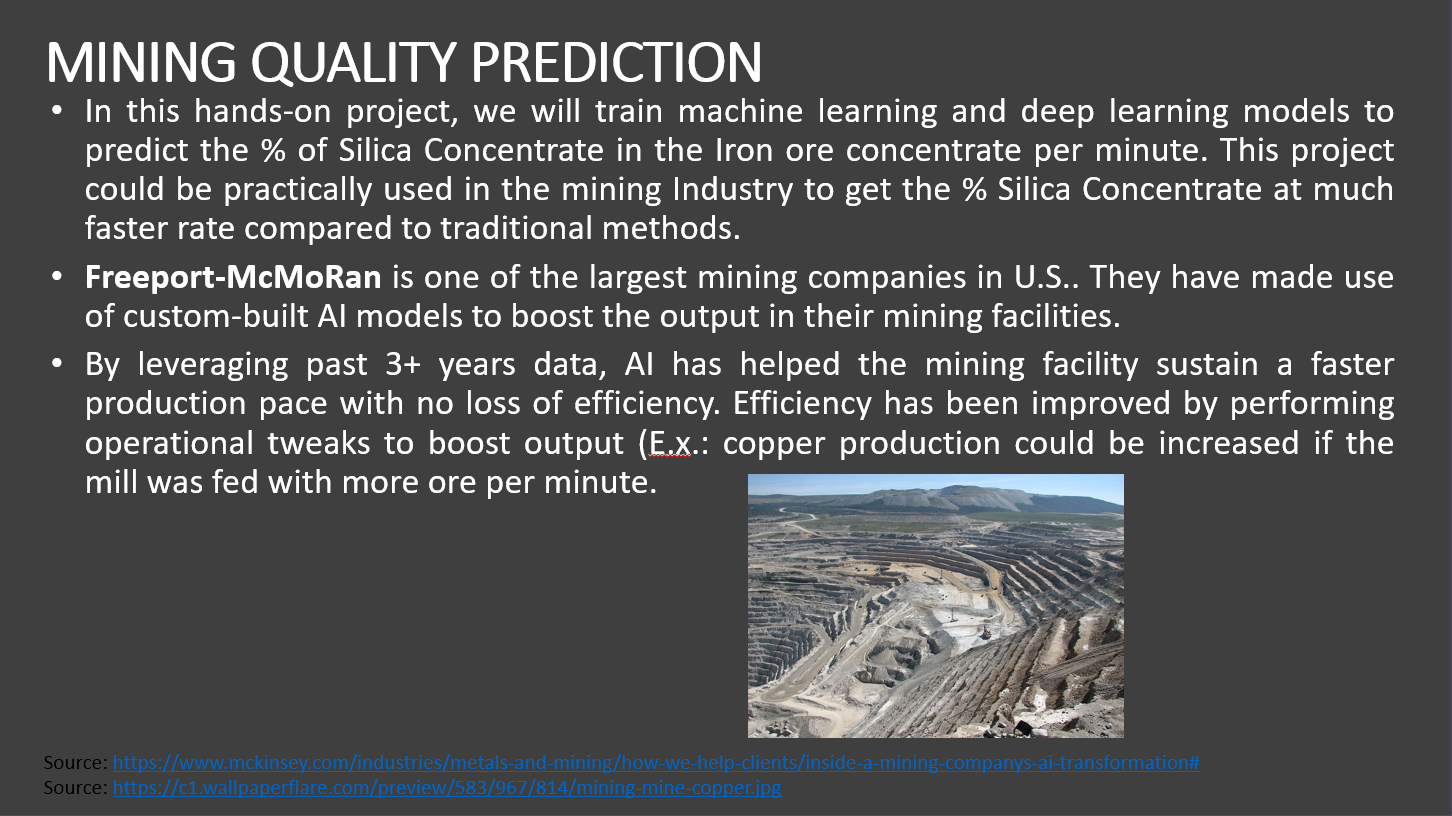

In [ ]:
# IMPORT LIBRARIES and DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [5]:
mining_df = pd.read_csv('mining_data.csv')

In [63]:
mining_df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [3]:
mining_df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [5]:
# check the number of null elements in the dataframe
mining_df.isnull()
mining_df.isnull().sum()


% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

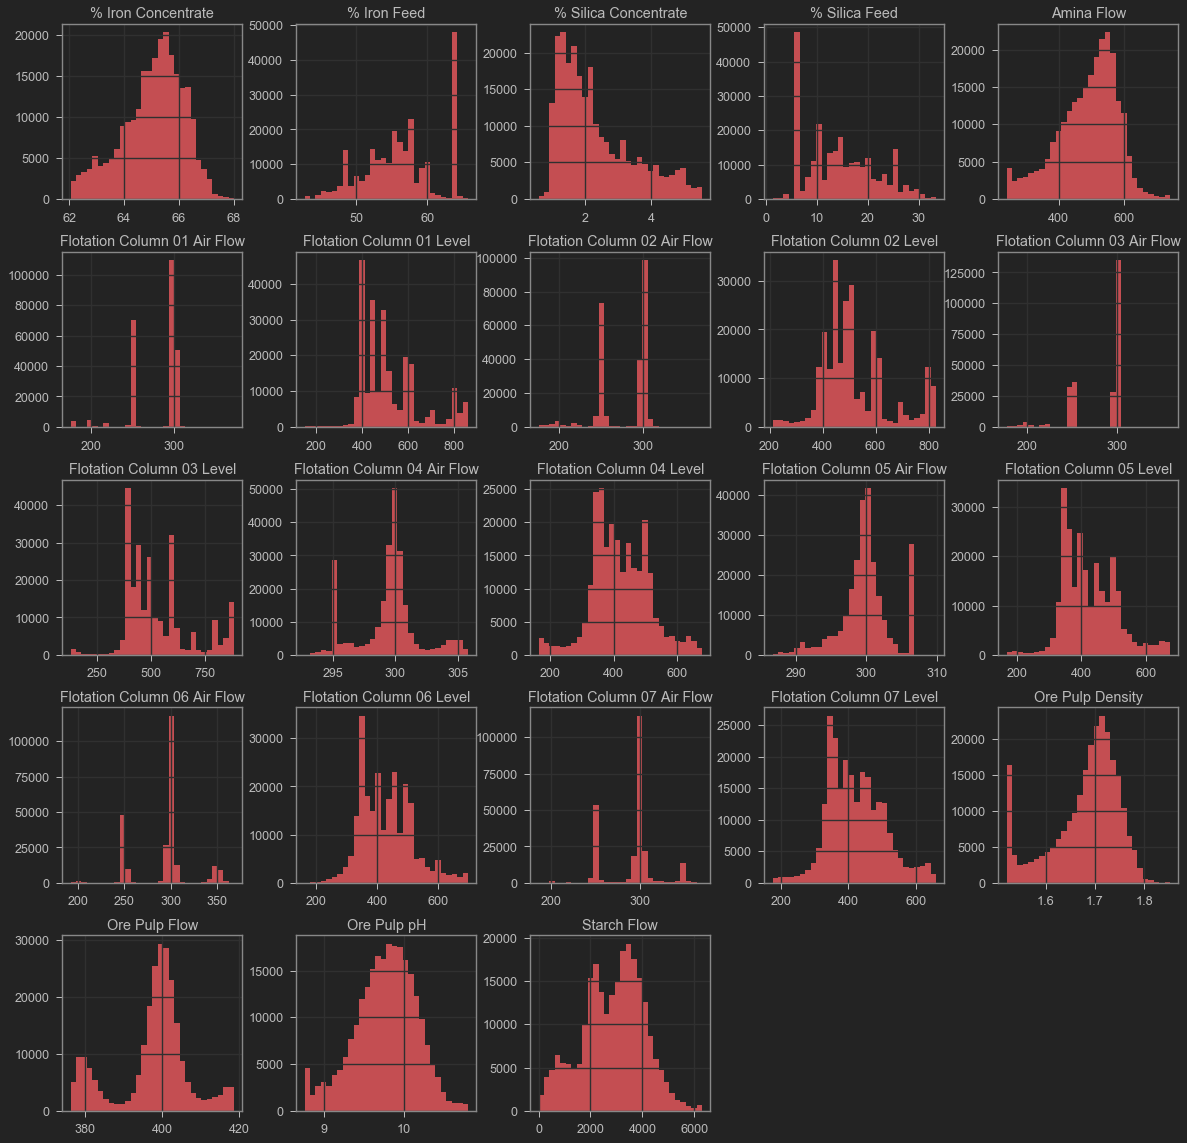

In [6]:
mining_df.hist(bins = 30, figsize = (20, 20), color = 'r')
plt.show()

In [7]:
# Obtain the correlation matrix
mining_df.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971837,0.028644,-0.088595,0.164676,0.007496,-0.125583,-0.062448,-0.170716,-0.062318,...,-0.016722,0.029619,0.020928,0.015189,0.016346,0.023571,0.003910,0.026100,0.055526,-0.077108
% Silica Feed,-0.971837,1.000000,-0.016489,0.079065,-0.154508,0.007953,0.104567,0.091833,0.183953,0.084325,...,0.046193,-0.038417,-0.037113,-0.022653,-0.034534,-0.044270,-0.020568,-0.047079,-0.044292,0.072778
Starch Flow,0.028644,-0.016489,1.000000,0.261934,0.044926,0.269135,0.231530,0.195538,0.192244,0.187602,...,0.202817,-0.302567,-0.286336,-0.309177,-0.013037,-0.057417,-0.077105,-0.039584,0.071303,-0.068008
Amina Flow,-0.088595,0.079065,0.261934,1.000000,0.219162,0.124254,0.659461,0.111994,0.124490,0.102632,...,0.081561,-0.270753,-0.236452,-0.288484,-0.183739,-0.215334,-0.209496,-0.171384,-0.111045,0.157644
Ore Pulp Flow,0.164676,-0.154508,0.044926,0.219162,1.000000,0.121256,0.012571,-0.141215,-0.122322,-0.144232,...,-0.146904,-0.008877,-0.008335,-0.055890,-0.010212,0.002158,-0.018051,0.017185,0.085098,0.008519
Ore Pulp pH,0.007496,0.007953,0.269135,0.124254,0.121256,1.000000,0.115073,0.163433,0.146264,0.193887,...,0.178322,-0.166525,-0.154391,-0.140251,0.046933,0.013095,-0.079157,0.019193,0.192705,-0.147550
Ore Pulp Density,-0.125583,0.104567,0.231530,0.659461,0.012571,0.115073,1.000000,-0.004695,0.026413,-0.031237,...,-0.052655,-0.112201,-0.093542,-0.149823,-0.089066,-0.142675,-0.105346,-0.087454,0.015116,0.047413
Flotation Column 01 Air Flow,-0.062448,0.091833,0.195538,0.111994,-0.141215,0.163433,-0.004695,1.000000,0.854298,0.955256,...,0.658199,-0.443870,-0.428294,-0.372533,-0.062665,-0.092254,-0.125196,-0.112074,0.099239,-0.219698
Flotation Column 02 Air Flow,-0.170716,0.183953,0.192244,0.124490,-0.122322,0.146264,0.026413,0.854298,1.000000,0.866927,...,0.592888,-0.437313,-0.428303,-0.368913,-0.075833,-0.112465,-0.124478,-0.114693,0.059709,-0.169029
Flotation Column 03 Air Flow,-0.062318,0.084325,0.187602,0.102632,-0.144232,0.193887,-0.031237,0.955256,0.866927,1.000000,...,0.661261,-0.443454,-0.423836,-0.365800,-0.047216,-0.064355,-0.105673,-0.086448,0.100888,-0.219593


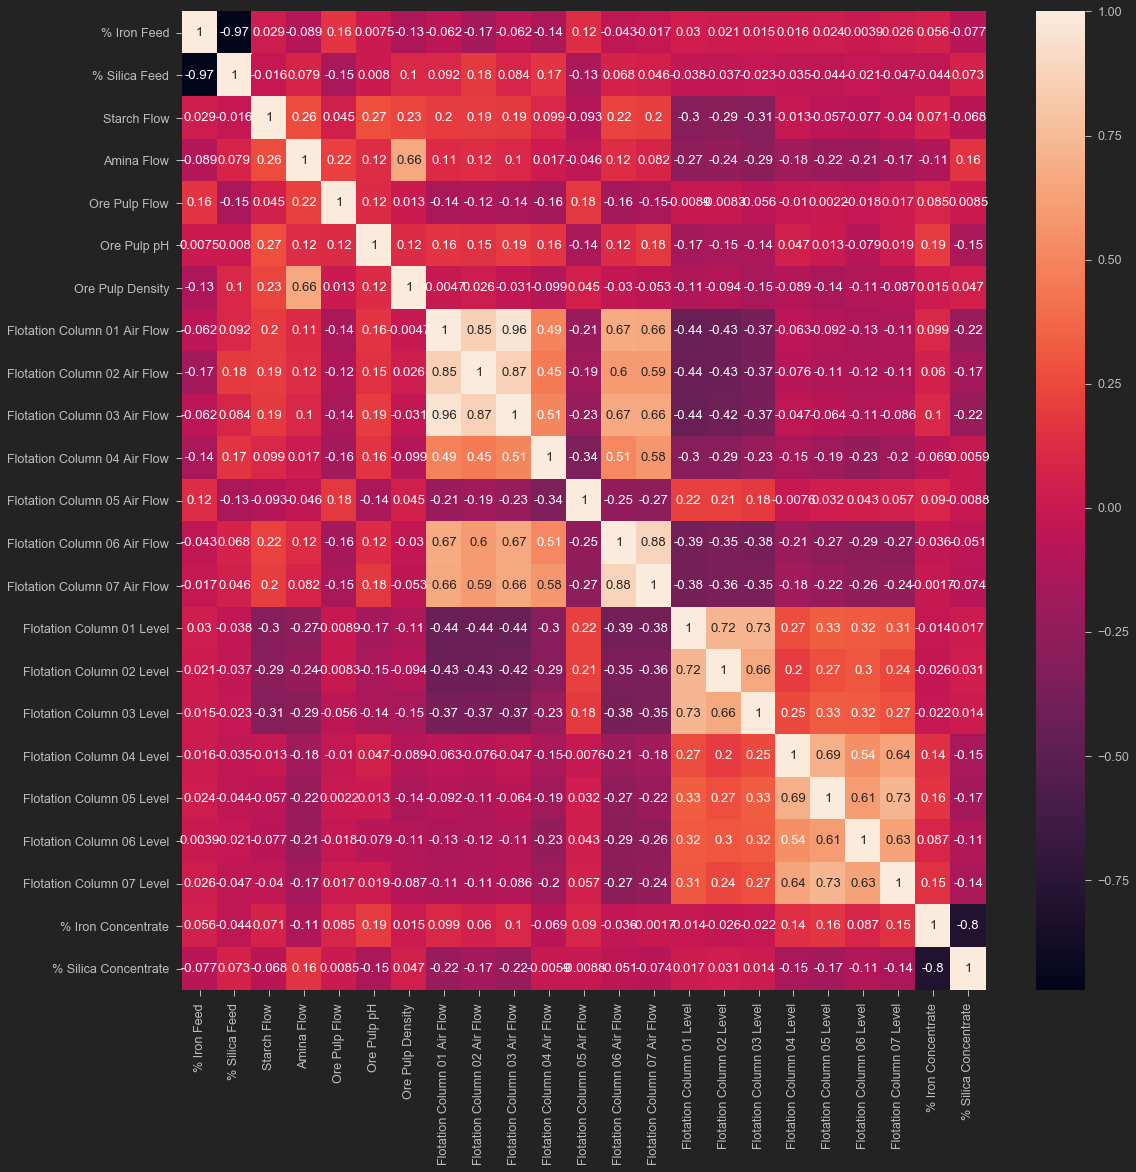

In [8]:
plt.figure(figsize = (18,18))
sns.heatmap(mining_df.corr(), annot = True) #hratmap = corr matrix
# From this pair plot, we can infer that there is a relationship between iron feed and silica feed 
# Also, a relationship between silica concentrate and iron concentrate.

In [ ]:
# before model training data - (x,1)

In [9]:
mining_df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [6]:
df_iron = mining_df.drop(columns = '% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']
df_iron.shape

(245700, 22)

In [7]:
df_iron_target.shape

(245700,)

In [8]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [9]:
# reshaping the array
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape #Batch format

(245700, 1)

In [10]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(df_iron)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_iron_target)

In [11]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
X_test.shape

(49140, 22)

In [13]:
X_train.shape

(196560, 22)

In [ ]:
# import, train, fit the model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.6794122886540674

In [16]:
# desision tree and tree ensemble(ramdom forest)

from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.983353950648811

In [18]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [19]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 10, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8894091263091682

# ARTIFICIAL NEURAL NETWORK TO PERFORM REGRESSION 

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation = 'relu'))
ANN_model.add(Dropout(0.1)) #regularization
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation = 'linear'))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               5750      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               125500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0

In [ ]:
history = ANN_model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Train on 157248 samples, validate on 39312 samples
Epoch 1/5
157248/157248 [==============================] - 297s 2ms/sample - loss: 0.2099 - val_loss: 0.1440
Epoch 2/5
 47296/157248 [========>.....................] - ETA: 3:08 - loss: 0.1575- ETA: 3

In [85]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

49140/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy : 0.9144056252452917


In [86]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

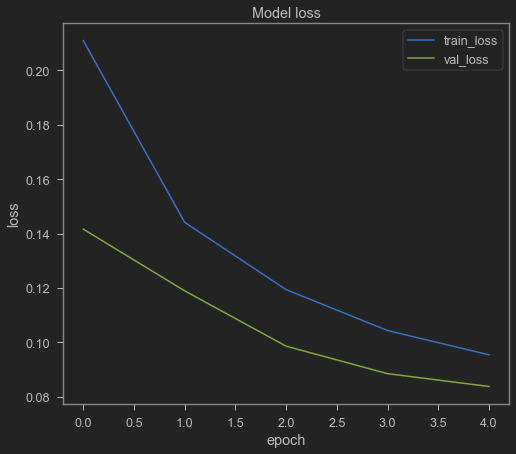

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
##### COMPARE MODELS AND CALCULATE REGRESSION KPIs 


In [ ]:
# From the above results, it can be seen that, decision tree model out-performs the other models.

Text(0, 0.5, 'True Values')

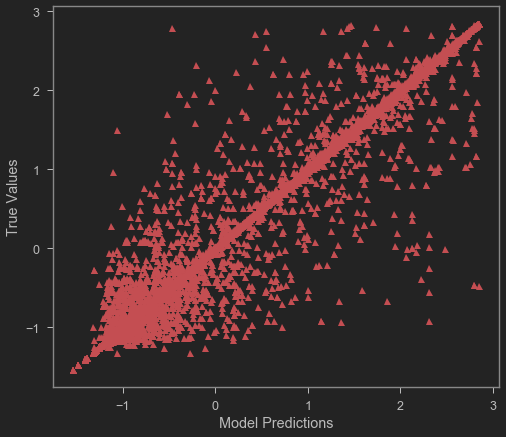

In [22]:
y_predict = DecisionTree_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

Text(0, 0.5, 'True Values')

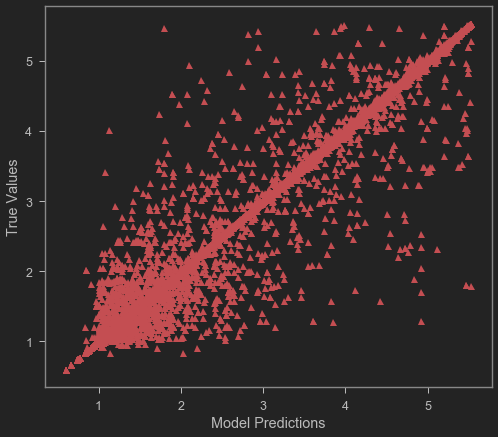

In [23]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.146 
MSE = 0.021350478446008816 
MAE = 0.021169448770823385 
R2 = 0.9832834328256759 
Adjusted R2 = 0.9832759453065311


# CAPSTONE PROJECT

In [ ]:
# from kaggle dataset my projects

# CAPSTONE PROJECT SOLUTION

In [ ]:
# checkpoint 1  this is for bike sharing dataset from kaggle done today- may 2023

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

rental_df = pd.read_csv('bike_sharing_daily.csv')
rental_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [ ]:
# checkpoint 2

In [26]:
rental_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [27]:
rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


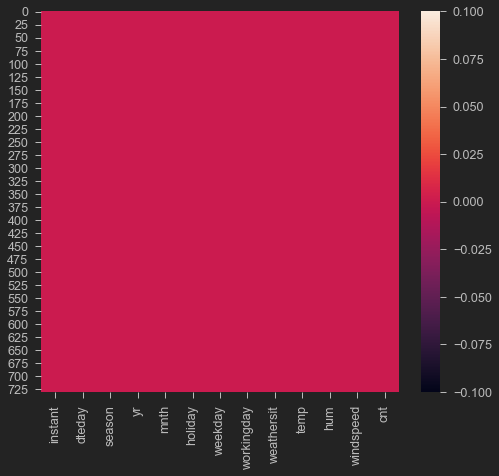

In [28]:
sns.heatmap(rental_df.isnull())

In [29]:
rental_df = rental_df.drop(labels = ['instant'], axis = 1)

In [30]:
rental_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


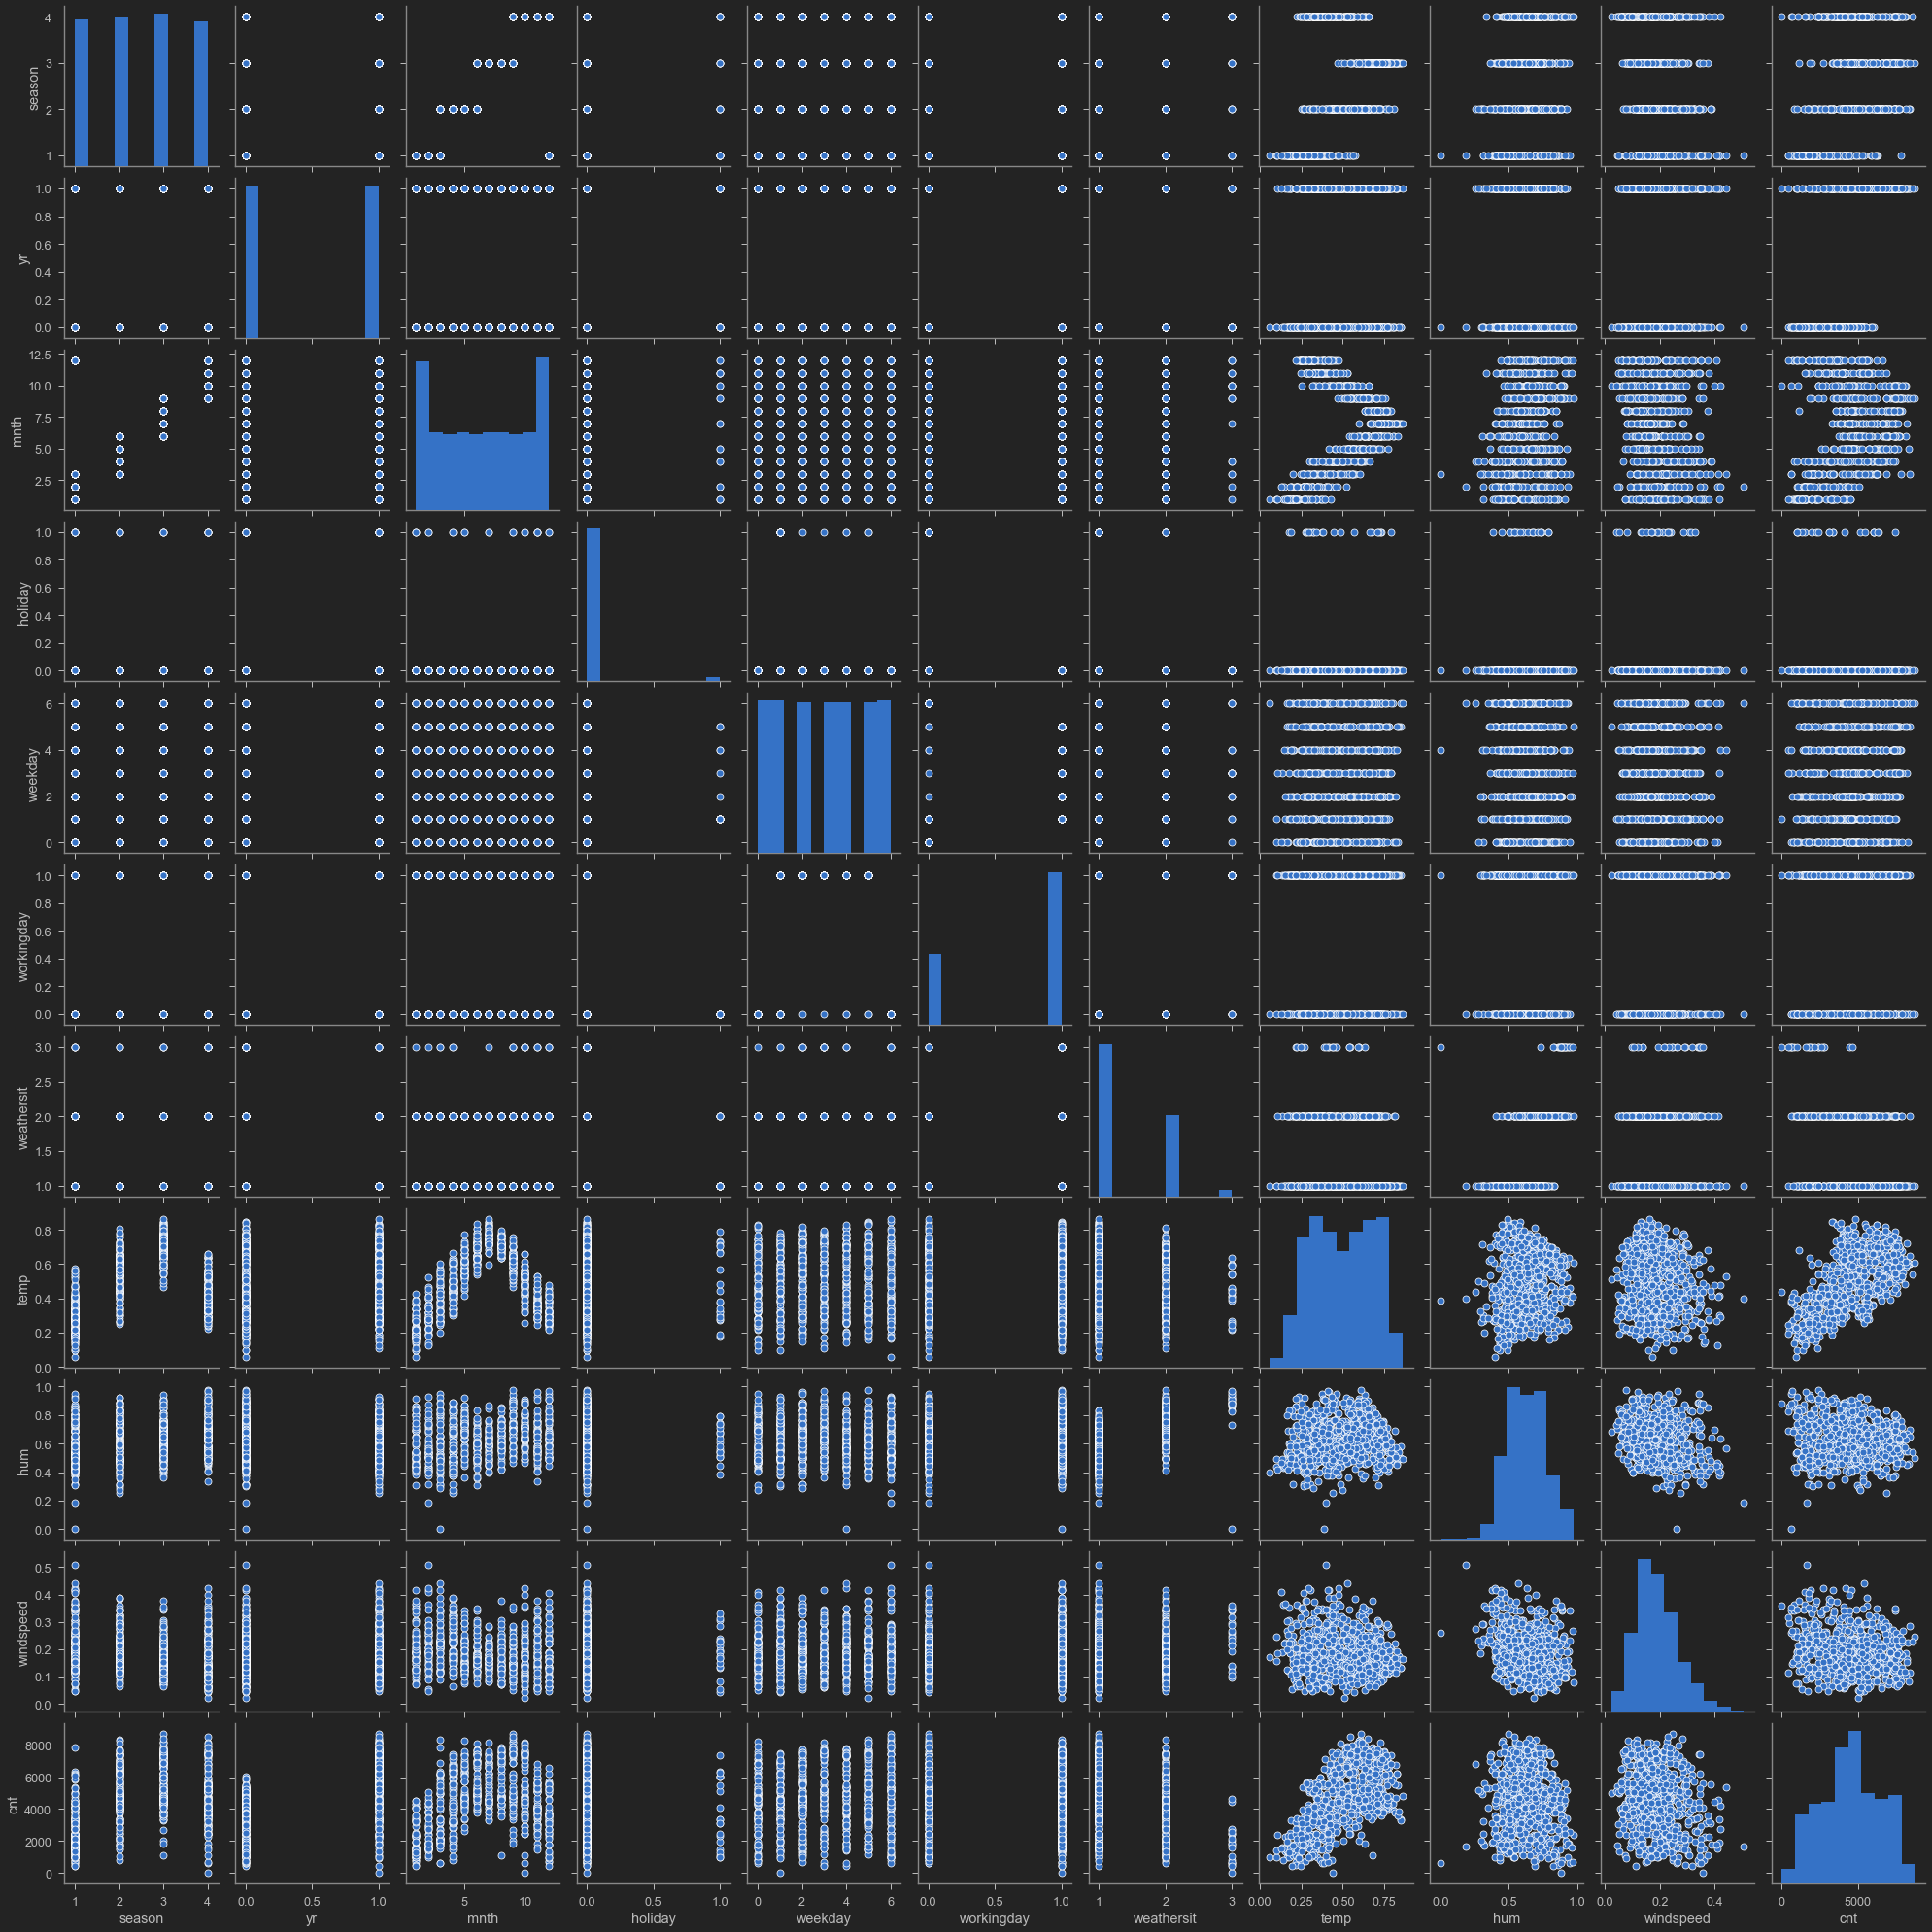

In [31]:
sns.pairplot(rental_df)

In [ ]:
# checkpoint 3

In [32]:
X_numerical = rental_df[['temp', 'hum', 'windspeed', 'cnt']]
X_numerical

,temp,hum,windspeed,cnt
0,0.344167,0.805833,0.160446,985
1,0.363478,0.696087,0.248539,801
2,0.196364,0.437273,0.248309,1349
3,0.200000,0.590435,0.160296,1562
4,0.226957,0.436957,0.186900,1600
...,...,...,...,...
726,0.254167,0.652917,0.350133,2114
727,0.253333,0.590000,0.155471,3095
728,0.253333,0.752917,0.124383,1341
729,0.255833,0.483333,0.350754,1796


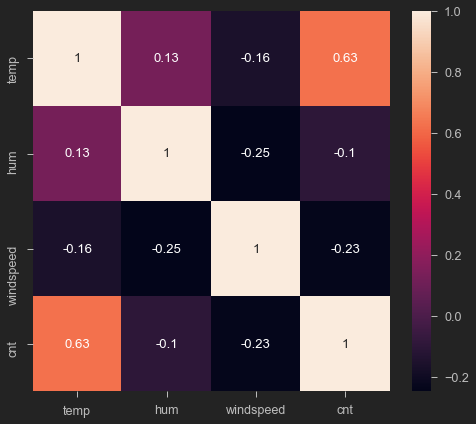

In [33]:
sns.heatmap(X_numerical.corr(), annot = True)

In [ ]:
# checkpoint4

In [34]:
X_cat = rental_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [36]:
X_cat.shape

(731, 32)

In [37]:
X_cat = pd.DataFrame(X_cat)

In [38]:
X_numerical

,temp,hum,windspeed,cnt
0,0.344167,0.805833,0.160446,985
1,0.363478,0.696087,0.248539,801
2,0.196364,0.437273,0.248309,1349
3,0.200000,0.590435,0.160296,1562
4,0.226957,0.436957,0.186900,1600
...,...,...,...,...
726,0.254167,0.652917,0.350133,2114
727,0.253333,0.590000,0.155471,3095
728,0.253333,0.752917,0.124383,1341
729,0.255833,0.483333,0.350754,1796


In [39]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [40]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1:].values

In [ ]:
# checkpoint 5

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [ ]:
# checkpoint 6

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# checkpoint 7

In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (35,)))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 1500, activation = 'relu', input_shape = (35,)))
model.add(tf.keras.layers.Dense(units = 1500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1500, activation = 'relu'))

# model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
# model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1500)              54000     
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_6 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1501      
Total params: 4,558,501
Trainable params: 4,558,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [47]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50 , validation_split = 0.2)

Train on 467 samples, validate on 117 samples
Epoch 1/100
467/467 [==============================] - 2s 4ms/sample - loss: 0.3973 - val_loss: 0.0597
Epoch 2/100
467/467 [==============================] - 1s 3ms/sample - loss: 0.0492 - val_loss: 0.0332
Epoch 3/100
467/467 [==============================] - 1s 2ms/sample - loss: 0.0183 - val_loss: 0.0136
Epoch 4/100
467/467 [==============================] - 1s 2ms/sample - loss: 0.0122 - val_loss: 0.0082
Epoch 5/100
467/467 [==============================] - 1s 2ms/sample - loss: 0.0095 - val_loss: 0.0077
Epoch 6/100
467/467 [==============================] - 1s 3ms/sample - loss: 0.0085 - val_loss: 0.0082
Epoch 7/100
467/467 [==============================] - 1s 2ms/sample - loss: 0.0072 - val_loss: 0.0077
Epoch 8/100
467/467 [==============================] - 1s 2ms/sample - loss: 0.0067 - val_loss: 0.0077
Epoch 9/100
467/467 [==============================] - 1s 3ms/sample - loss: 0.0060 - val_loss: 0.0078
Epoch 10/100
467/467 [=====

In [ ]:
# checkpoint 8

In [48]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation Loss')

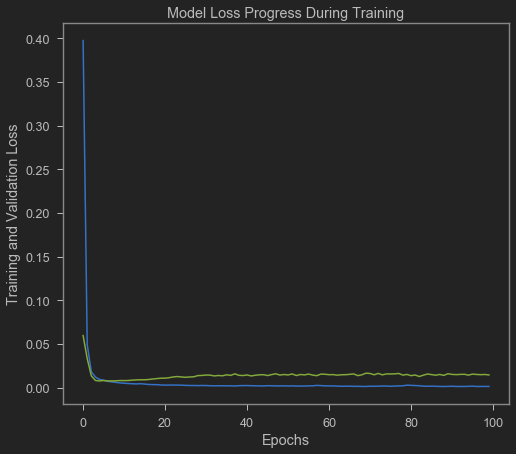

In [49]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')

In [ ]:
# checkpoint 9

Text(0, 0.5, 'True Values')

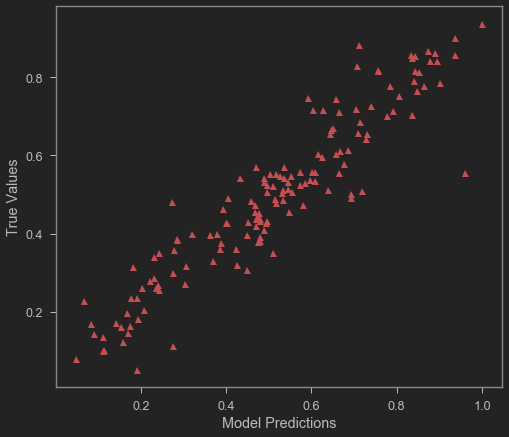

In [50]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [51]:
y_predict_orig = scaler.inverse_transform(y_predict)

In [52]:
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

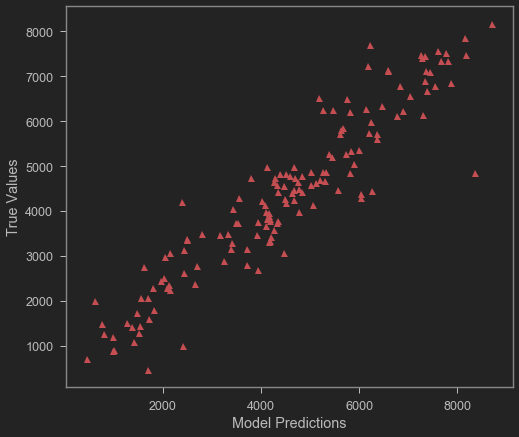

In [53]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [54]:
k = X_test.shape[1]
n = len(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '0.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 709.305 
MSE = 503113.29750219797 
MAE = 532.767473285701 
R2 = 0.8716303386426021 
Adjusted R2 = 0.831153418394774


In [55]:
# Statistic summary of the dataframe
mining_df.describe()
# Average % Silica concentrate = 2.32%
# Maximum % Iron Concentrate = 68%

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,...,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,...,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,...,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,...,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527157,1.647197,250.268667,250.367333,250.693667,...,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,...,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,...,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,...,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


In [ ]:
# PRACTICE OPPORTUNITY 

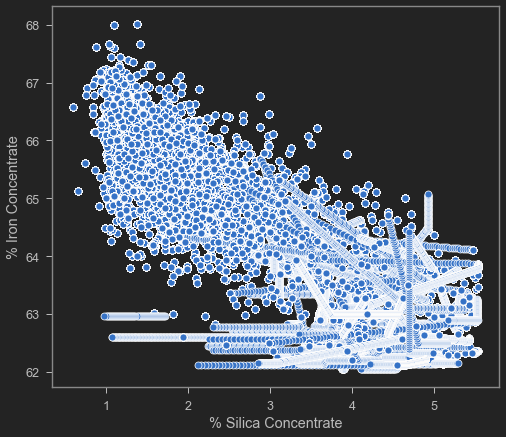

In [56]:
sns.scatterplot(mining_df['% Silica Concentrate'], mining_df['% Iron Concentrate'])


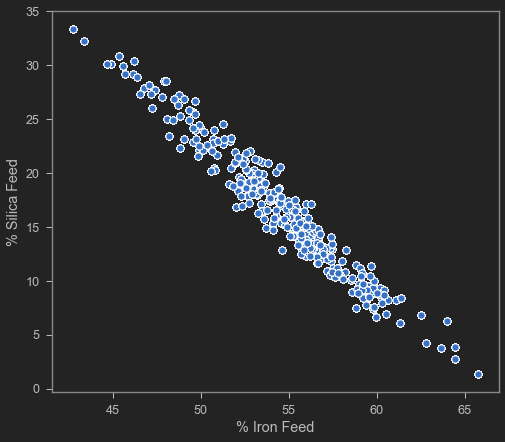

In [57]:
sns.scatterplot(mining_df['% Iron Feed'], mining_df['% Silica Feed'])

In [ ]:
# PRACTICE OPPORTUNITY 

In [58]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(n_estimators=10, max_depth=10)
RandomForest_model.fit(X_train, y_train)

accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8932394267879786

In [ ]:
# PRACTICE OPPORTUNITY 

In [ ]:
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))